In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing data
df = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
len(df)

7043

In [5]:
df1 = df

Droppping the following columns
1. Count - Dropped because its redundant
2. Churn Reason: Dropped beacuse it  has high number of missing values
3. Churn Score: Not required since this a classification task
4. Churn Label: Not needed because we have churn value
5. CustomerID: Not needed for this task
6. State: Redundant values
7. Country: Redudant values
8. Lat Long: There is another column called Latitude

In [6]:

df1.drop(['Count','Churn Reason','CLTV','Churn Score','Churn Label','Country','CustomerID','Lat Long','State'],axis=1, inplace=True)

In [7]:
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


DATA PREPROCESSING
1. Missing value check
2. Removing columns which aren't required.

In [8]:
#Dealing with missing data

df1.isna()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [10]:
df1.columns = df1.columns.str.replace(' ','_')

In [11]:
df1.replace(' ','_',inplace=True)

In [12]:
#Converting the datatype
df1.Total_Charges = pd.to_numeric(df1.Total_Charges,errors='coerce')

In [13]:
df1.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

Exploratory data analysis

Exploring the relationship between Tenure months and Churn_value, to check for a potential causation between the two

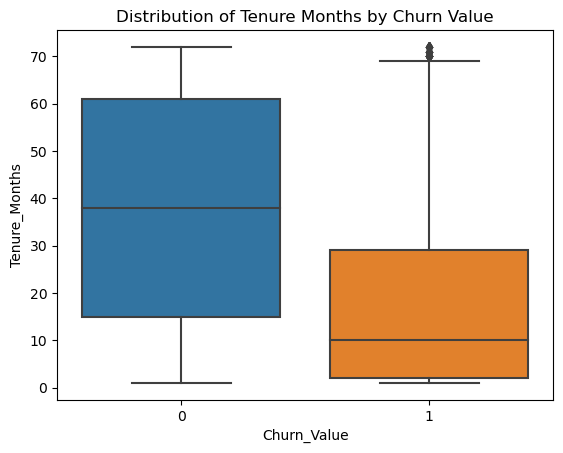

In [95]:
sns.boxplot(x=df1['Churn_Value'], y=df1['Tenure_Months'], data=df1)
plt.title('Distribution of Tenure Months by Churn Value')
plt.show()

In [15]:
df2 = df1[df1['Tenure_Months'] <= 30]

As per the plot above, we can see that most customers stopped using the service within 30 months, as there are very few people who quit using the service after 70 months

To understand why customers with tenure of months of less than 30 stopped using the service, A chisquare test to understand the 
relatopnship between categorical columns and tenure_months will be done. 

In [16]:
categorical_columns = df2.select_dtypes(include=['object']).columns

In [17]:
target_column = 'Tenure_Months'

In [18]:
from scipy.stats import chi2_contingency

In [19]:
alpha = 0.05
significant_results = []

In [20]:
for categorical_column in categorical_columns:
    if categorical_column != target_column:
        contingency_table = pd.crosstab(df1[categorical_column], df2[target_column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        print(f"Chi-Square Test between {categorical_column} and {target_column}:")
        print(f"Chi2 Value: {chi2}")
        print(f"P-Value: {p}")
        
        if p < alpha:
            print("There is a significant association.")
            significant_results.append((categorical_column, p))
        else:
            print("There is no significant association.")
        
        print("\n")

# Filter results based on p-values
significant_results.sort(key=lambda x: x[1])  # Sort by p-value

Chi-Square Test between City and Tenure_Months:
Chi2 Value: 31843.83858791256
P-Value: 0.8440055266719217
There is no significant association.


Chi-Square Test between Gender and Tenure_Months:
Chi2 Value: 28.88900578720279
P-Value: 0.5234330941622785
There is no significant association.


Chi-Square Test between Senior_Citizen and Tenure_Months:
Chi2 Value: 34.55102192766078
P-Value: 0.25934296690602804
There is no significant association.


Chi-Square Test between Partner and Tenure_Months:
Chi2 Value: 224.97057764799473
P-Value: 9.556603379678607e-32
There is a significant association.


Chi-Square Test between Dependents and Tenure_Months:
Chi2 Value: 104.06844842555961
P-Value: 4.1846696337131284e-10
There is a significant association.


Chi-Square Test between Phone_Service and Tenure_Months:
Chi2 Value: 28.731918548851013
P-Value: 0.53170996077416
There is no significant association.


Chi-Square Test between Multiple_Lines and Tenure_Months:
Chi2 Value: 205.1450046324711
P-Val

In [21]:
x = set(significant_results)

In [22]:
x

{('Contract', 8.542559983560767e-108),
 ('Dependents', 4.1846696337131284e-10),
 ('Device_Protection', 7.697516304562342e-18),
 ('Multiple_Lines', 9.306024159955214e-18),
 ('Online_Backup', 1.3654797041288145e-15),
 ('Online_Security', 6.450163954403335e-14),
 ('Partner', 9.556603379678607e-32),
 ('Payment_Method', 1.5514178294095295e-24),
 ('Streaming_Movies', 6.533499151155094e-12),
 ('Streaming_TV', 3.632864211998592e-13),
 ('Tech_Support', 1.4844561186355235e-16)}

In [23]:
categorical_var1 = 'Contract'
categorical_var2 = 'Churn_Value'
numerical_var = target_column

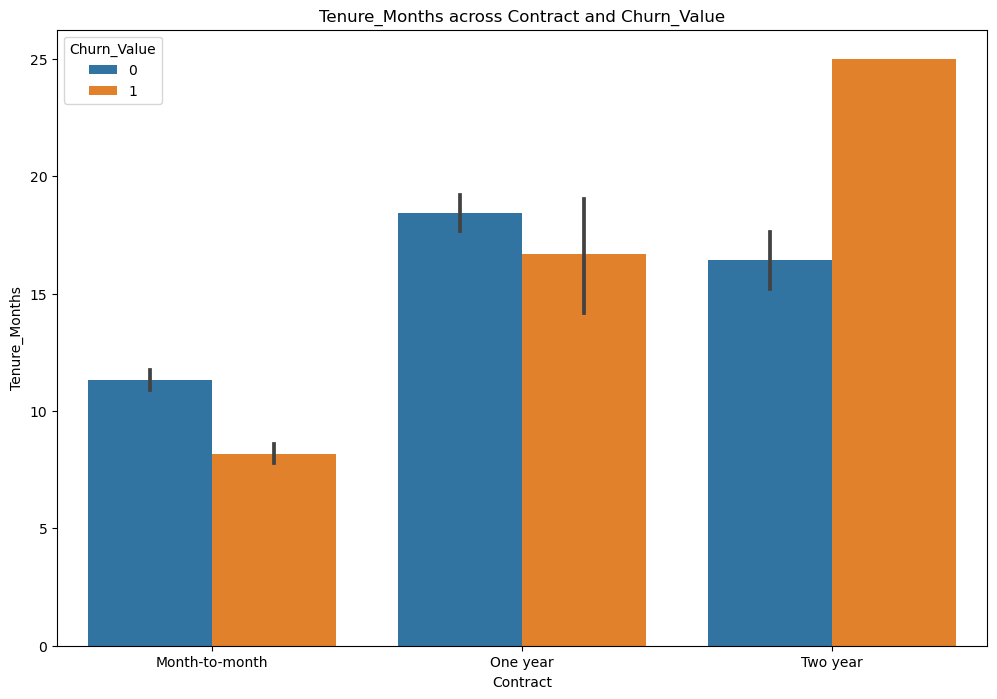

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x=categorical_var1, y=numerical_var, hue=categorical_var2, data=df2)
plt.title(f'{numerical_var} across {categorical_var1} and {categorical_var2}')
plt.show()

From the above graph, it can be seen that many customers who got churned had a two year contract. 
This matches with the earlier finding that many customers quit within a tenure of 30 months.

In [25]:
categorical_var1 = 'Senior_Citizen'
categorical_var2 = 'Churn_Value'
numerical_var = target_column

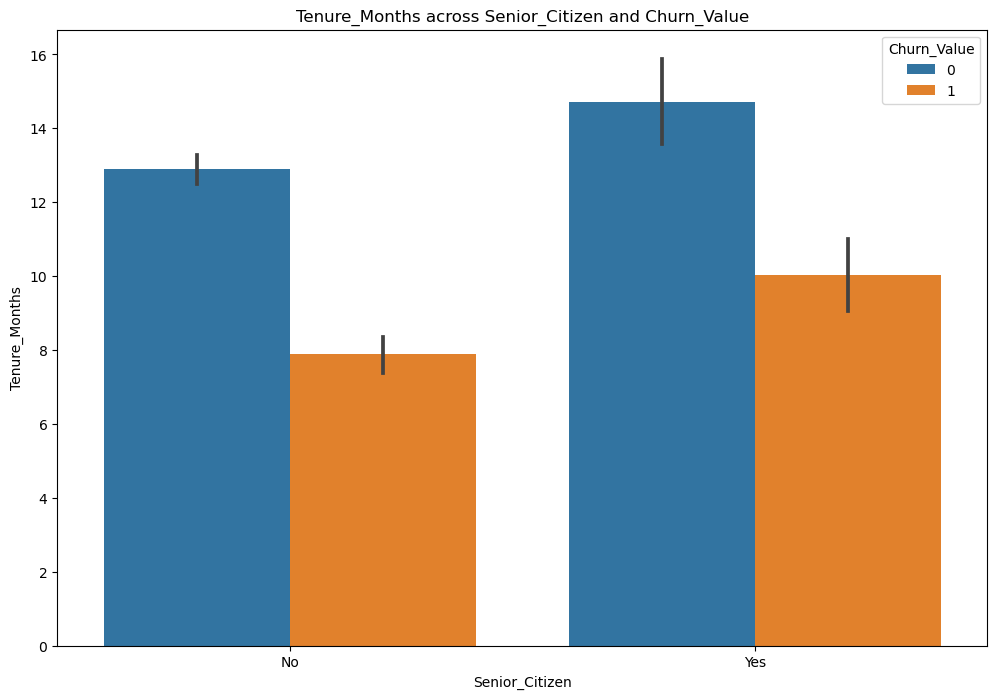

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x=categorical_var1, y=numerical_var, hue=categorical_var2, data=df2)
plt.title(f'{numerical_var} across {categorical_var1} and {categorical_var2}')
plt.show()

Exploring the relationship between Senior_Citizen and Churn_Value. It seems that being a senior citizen has little to do with churn.

In [27]:
#plotting a bar chart to understand the distribution of tech_support categeory distribution for churned and unchurned customers

In [28]:
mat1 = df2.groupby('Churn_Value')['Tech_Support'].value_counts(normalize=True).unstack().fillna(0) * 100

In [29]:
mat1

Tech_Support,No,No internet service,Yes
Churn_Value,,,
0,46.389892,33.258123,20.351986
1,80.631579,7.298246,12.070175


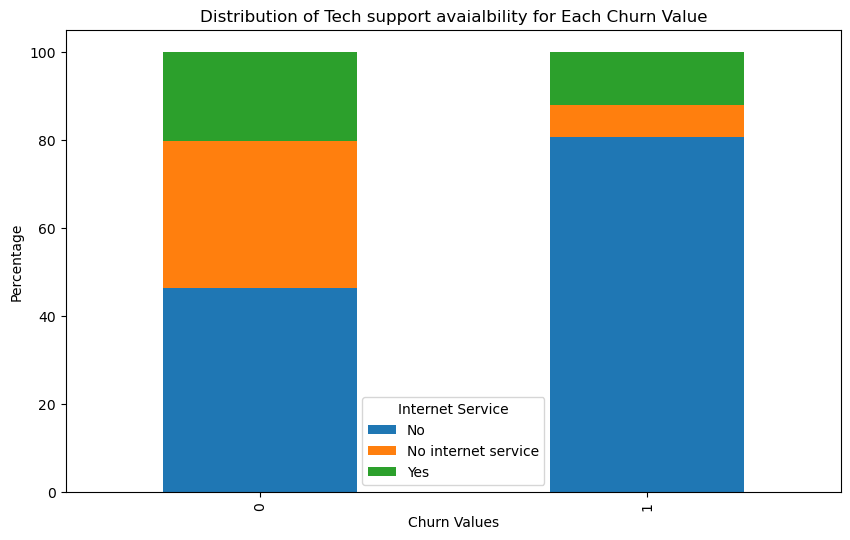

In [30]:
# Plotting a stacked bar chart
mat1.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Churn Values')
plt.ylabel('Percentage')
plt.title('Distribution of Tech support avaialbility for Each Churn Value')
plt.legend(title='Internet Service')
plt.show()

As seen from the plot above, many churned customers had no tech support as compared to unchurned customers.

In [31]:
mat2 = df2.groupby('Churn_Value')['Device_Protection'].value_counts(normalize=True).unstack().fillna(0) * 100

In [32]:
mat2

Device_Protection,No,No internet service,Yes
Churn_Value,,,
0,47.833935,33.258123,18.907942
1,71.017544,7.298246,21.684211


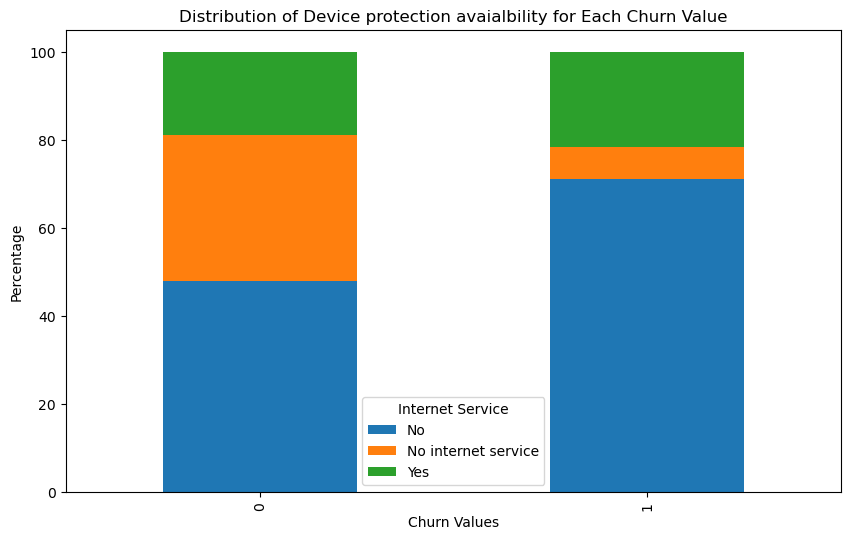

In [33]:
# Plotting a stacked bar chart
mat2.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Churn Values')
plt.ylabel('Percentage')
plt.title('Distribution of Device protection avaialbility for Each Churn Value')
plt.legend(title='Internet Service')
plt.show()

As seen from the plot above, many churned customers had no Device protection as compared to unchurned customers. The distribution is actually similar to that of the previous plot(tech support) 

In [34]:
mat3 = df2.groupby('Churn_Value')['Online_Security'].value_counts(normalize=True).unstack().fillna(0) * 100

In [35]:
mat3

Online_Security,No,No internet service,Yes
Churn_Value,,,
0,46.931408,33.258123,19.810469
1,80.771930,7.298246,11.929825


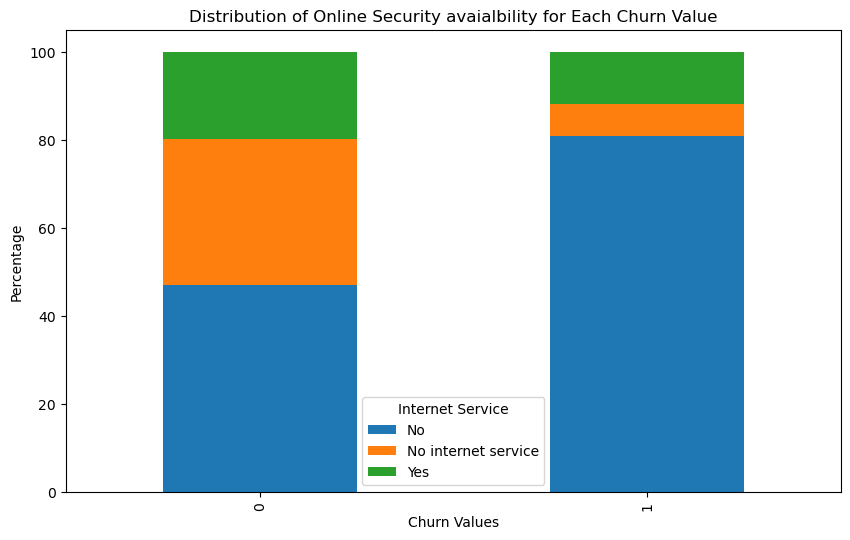

In [36]:
# Plotting a stacked bar chart
mat3.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Churn Values')
plt.ylabel('Percentage')
plt.title('Distribution of Online Security avaialbility for Each Churn Value')
plt.legend(title='Internet Service')
plt.show()

As seen from the plot above, many churned customers had no Online Security as compared to unchurned customers. The distribution is actually similar to that of the previous plots i.e (tech support) and device protection

Since the distriubtion is almost the same for the 3 columns, i.e tech_support, device protection and online secruity, any 2 of these columns can be removed

In [37]:
df1.drop(['Device_Protection','Online_Security'],axis=1,inplace=True)

In [38]:
tenure_churn_freq = df1.groupby(['Tenure_Months', 'Churn_Value']).size().unstack(fill_value=0)

In [39]:
mat1 = tenure_churn_freq

In [40]:
mat1[mat1[0] == 0]

Churn_Value,0,1
Tenure_Months,,


In [41]:
mat1[mat1[1] == 0]

Churn_Value,0,1
Tenure_Months,,
0,11,0


It seems that for tenure months of 0, there are no churned customers, Thus those rows need not be included

In [42]:
x = df1[df1.Tenure_Months==0]

In [43]:
df1= df1[df1.Tenure_Months != 0]

In [44]:
df1.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


FEATURE ENGINEERING

Columns which high cardinality will be frequency encoded, while columns with low cardinality will be converted to dummy variables.
Numerical and categorical datatypes will be seperated for this purpose and again rejoined

In [45]:
df1.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Backup         object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [46]:
#Seperating the dependent and independent variables. 
x = df1.drop(['Churn_Value'],axis=1)

In [47]:
y = df1['Churn_Value']

In [48]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn_Value, Length: 7032, dtype: int64

In [49]:
x.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Internet_Service,Online_Backup,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Fiber optic,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Fiber optic,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [50]:
#seperating the numerical and categorical columns
x_cat_cols = x.dtypes[x.dtypes==object]

In [51]:
x_num_cols = x.dtypes[x.dtypes!=object]

In [52]:
x.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Backup', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges'],
      dtype='object')

In [53]:
x_dict = dict(x.dtypes)

In [54]:
x_dict

{'City': dtype('O'),
 'Zip_Code': dtype('int64'),
 'Latitude': dtype('float64'),
 'Longitude': dtype('float64'),
 'Gender': dtype('O'),
 'Senior_Citizen': dtype('O'),
 'Partner': dtype('O'),
 'Dependents': dtype('O'),
 'Tenure_Months': dtype('int64'),
 'Phone_Service': dtype('O'),
 'Multiple_Lines': dtype('O'),
 'Internet_Service': dtype('O'),
 'Online_Backup': dtype('O'),
 'Tech_Support': dtype('O'),
 'Streaming_TV': dtype('O'),
 'Streaming_Movies': dtype('O'),
 'Contract': dtype('O'),
 'Paperless_Billing': dtype('O'),
 'Payment_Method': dtype('O'),
 'Monthly_Charges': dtype('float64'),
 'Total_Charges': dtype('float64')}

In [55]:
x_cat = [i for i in x_dict.keys() if x_dict[i] == 'O']
    

In [56]:
x_num = [i for i in x_dict.keys() if x_dict[i] != 'O']

In [57]:
x_cat_df = df1[x_cat]

In [58]:
x_num_df = df1[x_num]

In [59]:
x_cat_df.head()

,City,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Backup,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method
0,Los Angeles,Male,No,No,No,Yes,No,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check
1,Los Angeles,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check
2,Los Angeles,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,Los Angeles,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,Los Angeles,Male,No,No,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


In [60]:
x_num_df.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges
0,90003,33.964131,-118.272783,2,53.85,108.15
1,90005,34.059281,-118.307420,2,70.70,151.65
2,90006,34.048013,-118.293953,8,99.65,820.50
3,90010,34.062125,-118.315709,28,104.80,3046.05
4,90015,34.039224,-118.266293,49,103.70,5036.30


In [61]:
#frequency encoding for City, the column City has high cardinality. To deal with this, frequency encoding will be applied.

x_cat_df['City'].value_counts()

Los Angeles      304
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Point Arena        4
Independence       3
Cupertino          3
Ben Lomond         3
Redcrest           3
Name: City, Length: 1129, dtype: int64

In [62]:
df1.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [63]:
x_cat_df.City.unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Tulelake',
       'Olympic Valley', 'Redcrest'], dtype=object)

In [64]:
x_cat_df.City.value_counts()

Los Angeles      304
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Point Arena        4
Independence       3
Cupertino          3
Ben Lomond         3
Redcrest           3
Name: City, Length: 1129, dtype: int64

In [65]:
mydict = dict(x_cat_df.City.value_counts())

In [66]:
x_cat_df.City = x_cat_df.City.map(mydict)

C:\Users\aksha\AppData\Local\Temp\ipykernel_34584\1538056491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat_df.City = x_cat_df.City.map(mydict)


In [67]:
x_cat_df.head()

,City,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Backup,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method
0,304,Male,No,No,No,Yes,No,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check
1,304,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check
2,304,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,304,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,304,Male,No,No,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


In [68]:
x_num_df

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges
0,90003,33.964131,-118.272783,2,53.85,108.15
1,90005,34.059281,-118.307420,2,70.70,151.65
2,90006,34.048013,-118.293953,8,99.65,820.50
3,90010,34.062125,-118.315709,28,104.80,3046.05
4,90015,34.039224,-118.266293,49,103.70,5036.30
...,...,...,...,...,...,...
7038,92285,34.341737,-116.539416,72,21.15,1419.40
7039,92301,34.667815,-117.536183,24,84.80,1990.50
7040,92304,34.559882,-115.637164,72,103.20,7362.90
7041,92305,34.167800,-116.864330,11,29.60,346.45


In [69]:
x_cat_df.head()

,City,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Backup,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method
0,304,Male,No,No,No,Yes,No,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check
1,304,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check
2,304,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,304,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,304,Male,No,No,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


In [70]:
catcols = x_cat_df.loc[:, x_cat_df.columns != 'City']

collist = catcols.columns

In [71]:
#converting categorical to dummy 

x_cat_df_proc = pd.get_dummies(x_cat_df,columns = collist )

In [72]:
df1_proc = [x_cat_df_proc,x_num_df]

In [73]:
x_num_df

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges
0,90003,33.964131,-118.272783,2,53.85,108.15
1,90005,34.059281,-118.307420,2,70.70,151.65
2,90006,34.048013,-118.293953,8,99.65,820.50
3,90010,34.062125,-118.315709,28,104.80,3046.05
4,90015,34.039224,-118.266293,49,103.70,5036.30
...,...,...,...,...,...,...
7038,92285,34.341737,-116.539416,72,21.15,1419.40
7039,92301,34.667815,-117.536183,24,84.80,1990.50
7040,92304,34.559882,-115.637164,72,103.20,7362.90
7041,92305,34.167800,-116.864330,11,29.60,346.45


In [74]:
x_cat_df_proc

,City,Gender_Female,Gender_Male,Senior_Citizen_No,Senior_Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone_Service_No,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,304,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,304,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,304,1,0,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
3,304,1,0,1,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,304,0,1,1,0,1,0,0,1,0,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
7039,5,0,1,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7040,5,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7041,5,1,0,1,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [75]:
df_proc = pd.concat(df1_proc,axis=1)

In [76]:
x = df_proc

In [77]:
x

,City,Gender_Female,Gender_Male,Senior_Citizen_No,Senior_Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone_Service_No,...,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges
0,304,0,1,1,0,1,0,1,0,0,...,0,0,0,1,90003,33.964131,-118.272783,2,53.85,108.15
1,304,1,0,1,0,1,0,0,1,0,...,0,0,1,0,90005,34.059281,-118.307420,2,70.70,151.65
2,304,1,0,1,0,1,0,0,1,0,...,0,0,1,0,90006,34.048013,-118.293953,8,99.65,820.50
3,304,1,0,1,0,0,1,0,1,0,...,0,0,1,0,90010,34.062125,-118.315709,28,104.80,3046.05
4,304,0,1,1,0,1,0,0,1,0,...,1,0,0,0,90015,34.039224,-118.266293,49,103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5,1,0,1,0,1,0,1,0,0,...,1,0,0,0,92285,34.341737,-116.539416,72,21.15,1419.40
7039,5,0,1,1,0,0,1,0,1,0,...,0,0,0,1,92301,34.667815,-117.536183,24,84.80,1990.50
7040,5,1,0,1,0,0,1,0,1,0,...,0,1,0,0,92304,34.559882,-115.637164,72,103.20,7362.90
7041,5,1,0,1,0,0,1,0,1,1,...,0,0,1,0,92305,34.167800,-116.864330,11,29.60,346.45


In [78]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn_Value, Length: 7032, dtype: int64

Understand the dependent variable distribution for the 2 classes.

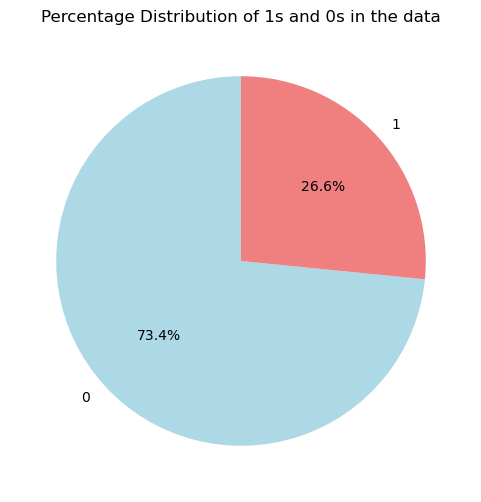

In [79]:
data = y.value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Percentage Distribution of 1s and 0s in the data')
plt.show()

By looking at the above graph, we can see that there is a class imbalance which might introduce bias into the xgboost model.

In [80]:
#splitting data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,stratify=y)

In [81]:
#Applying XGboost without SMOTE

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic',missing=1,seed=42)

clf_xgb.fit(x_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set = [(x_test,y_test)])

[0]	validation_0-aucpr:0.63192
[1]	validation_0-aucpr:0.64765
[2]	validation_0-aucpr:0.65925
[3]	validation_0-aucpr:0.65331
[4]	validation_0-aucpr:0.65439
[5]	validation_0-aucpr:0.65834
[6]	validation_0-aucpr:0.66177
[7]	validation_0-aucpr:0.65950
[8]	validation_0-aucpr:0.65948
[9]	validation_0-aucpr:0.65635
[10]	validation_0-aucpr:0.65642
[11]	validation_0-aucpr:0.65661
[12]	validation_0-aucpr:0.65142
[13]	validation_0-aucpr:0.65343
[14]	validation_0-aucpr:0.65221
[15]	validation_0-aucpr:0.64767
[16]	validation_0-aucpr:0.65107


C:\Users\aksha\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\aksha\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=1, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [82]:
x_test = x_test.dropna()
y_test = y_test.dropna()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


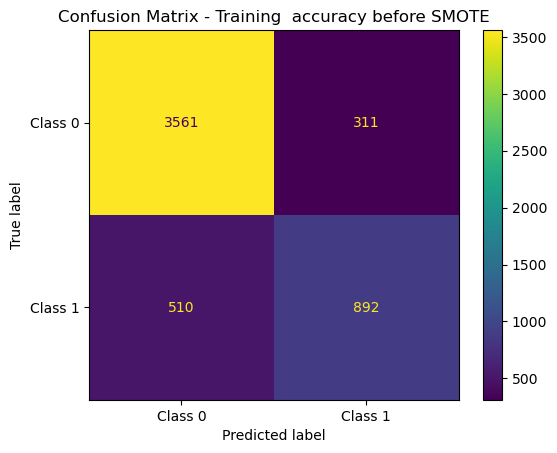

In [83]:
#Generating confusion matrix
disp = plot_confusion_matrix(clf_xgb, x_train, y_train, values_format='d', display_labels=['Class 0', 'Class 1'])
disp.ax_.set_title('Confusion Matrix - Training  accuracy before SMOTE')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


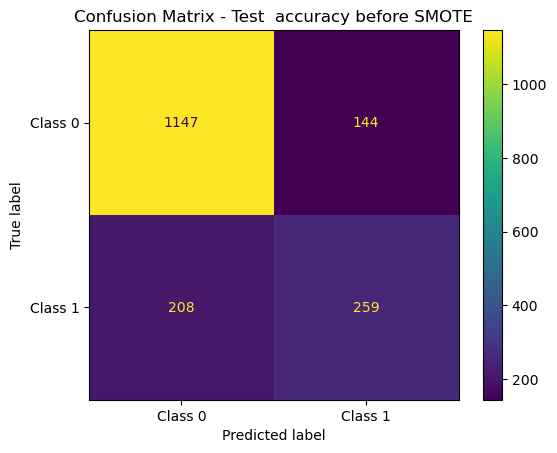

In [84]:
#Generating confusion matrix
disp = plot_confusion_matrix(clf_xgb, x_test, y_test, values_format='d', display_labels=['Class 0', 'Class 1'])
disp.ax_.set_title('Confusion Matrix - Test  accuracy before SMOTE')
plt.show()

In [85]:
from imblearn.combine import SMOTEENN


In [86]:
smoteenn = SMOTEENN(sampling_strategy={0: 8000, 1: 4800}, random_state=42)

In [87]:
X_resampled, y_resampled = smoteenn.fit_resample(x, y)


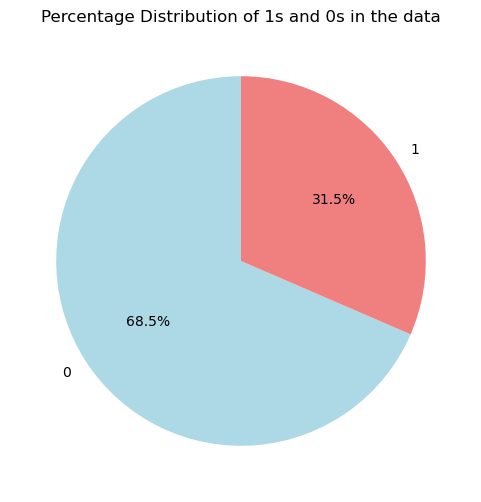

In [94]:
data = y_resampled.value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Percentage Distribution of 1s and 0s in the data')
plt.show()

In [88]:
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,y_resampled,random_state=42)

In [89]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic',missing=1,seed=42)

clf_xgb.fit(x_train_resampled,y_train_resampled,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set = [(x_test_resampled,y_test_resampled)])

[0]	validation_0-aucpr:0.86048
[1]	validation_0-aucpr:0.87761
[2]	validation_0-aucpr:0.89205
[3]	validation_0-aucpr:0.90030
[4]	validation_0-aucpr:0.90014
[5]	validation_0-aucpr:0.90538
[6]	validation_0-aucpr:0.91098
[7]	validation_0-aucpr:0.91497
[8]	validation_0-aucpr:0.91745
[9]	validation_0-aucpr:0.92066
[10]	validation_0-aucpr:0.92185
[11]	validation_0-aucpr:0.92402
[12]	validation_0-aucpr:0.92523
[13]	validation_0-aucpr:0.92629
[14]	validation_0-aucpr:0.92873
[15]	validation_0-aucpr:0.92972
[16]	validation_0-aucpr:0.93066
[17]	validation_0-aucpr:0.93192
[18]	validation_0-aucpr:0.93206


C:\Users\aksha\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\aksha\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-aucpr:0.93210
[20]	validation_0-aucpr:0.93456
[21]	validation_0-aucpr:0.93504
[22]	validation_0-aucpr:0.93602
[23]	validation_0-aucpr:0.93669
[24]	validation_0-aucpr:0.93808
[25]	validation_0-aucpr:0.93886
[26]	validation_0-aucpr:0.93988
[27]	validation_0-aucpr:0.94031
[28]	validation_0-aucpr:0.94093
[29]	validation_0-aucpr:0.94181
[30]	validation_0-aucpr:0.94256
[31]	validation_0-aucpr:0.94280
[32]	validation_0-aucpr:0.94341
[33]	validation_0-aucpr:0.94392
[34]	validation_0-aucpr:0.94415
[35]	validation_0-aucpr:0.94497
[36]	validation_0-aucpr:0.94447
[37]	validation_0-aucpr:0.94497
[38]	validation_0-aucpr:0.94491
[39]	validation_0-aucpr:0.94580
[40]	validation_0-aucpr:0.94689
[41]	validation_0-aucpr:0.94744
[42]	validation_0-aucpr:0.94873
[43]	validation_0-aucpr:0.94903
[44]	validation_0-aucpr:0.94962
[45]	validation_0-aucpr:0.94997
[46]	validation_0-aucpr:0.95066
[47]	validation_0-aucpr:0.95063
[48]	validation_0-aucpr:0.95072
[49]	validation_0-aucpr:0.95109
[50]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=1, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


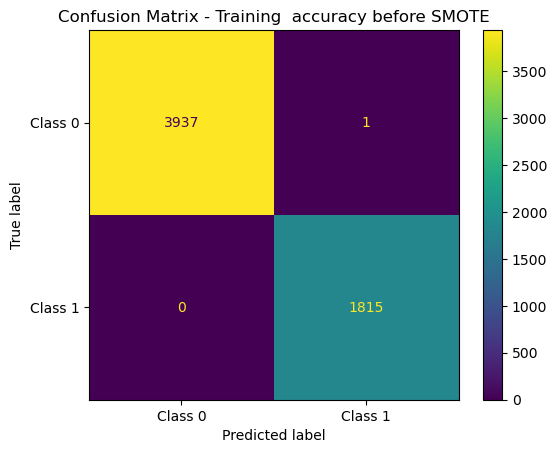

In [90]:
#Generating confusion matrix
disp = plot_confusion_matrix(clf_xgb, x_train_resampled, y_train_resampled, values_format='d', display_labels=['Class 0', 'Class 1'])
disp.ax_.set_title('Confusion Matrix - Training  accuracy before SMOTE')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


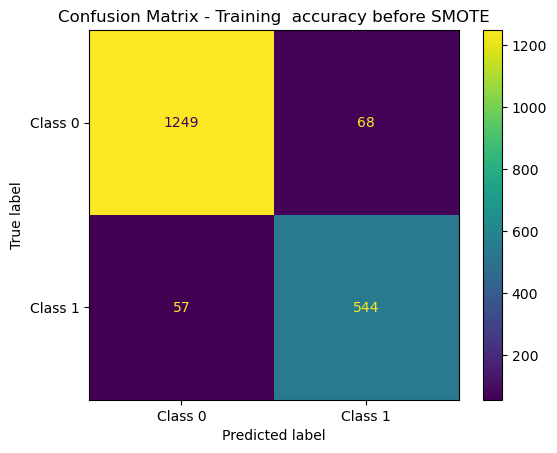

In [91]:
#Generating confusion matrix
disp = plot_confusion_matrix(clf_xgb, x_test_resampled, y_test_resampled, values_format='d', display_labels=['Class 0', 'Class 1'])
disp.ax_.set_title('Confusion Matrix - Training  accuracy before SMOTE')
plt.show()